In [2]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-02-25 18:22:57--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.193.208, 2607:f8b0:4007:80e::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.193.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   205MB/s    in 0.3s    

2020-02-25 18:22:58 (205 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ = zipfile.ZipFile(local_zip)
zip_.extractall()
zip_.close()

In [0]:
base_dir = '/content/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_dir = os.path.join(base_dir, 'validation')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


In [6]:
train_cats_dir

'/content/cats_and_dogs_filtered/train/cats'

In [0]:
# all_dog_files = os.listdir( train_dogs_dir )
# dogs_files = [os.path.join(train_dogs_dir, file) for file in all_dog_files][:25]

def plot_images(item_dir, top=25):
  all_item_dir = os.listdir( item_dir )
  item_files = [os.path.join(item_dir, file) for file in all_item_dir][:top]

  plt.figure(figsize=(10, 10))
  for idx, img_path in enumerate(item_files):
    plt.subplot(5, 5, idx+1)

    img = mpimg.imread(img_path)
    plt.imshow(img)

  plt.tight_layout()

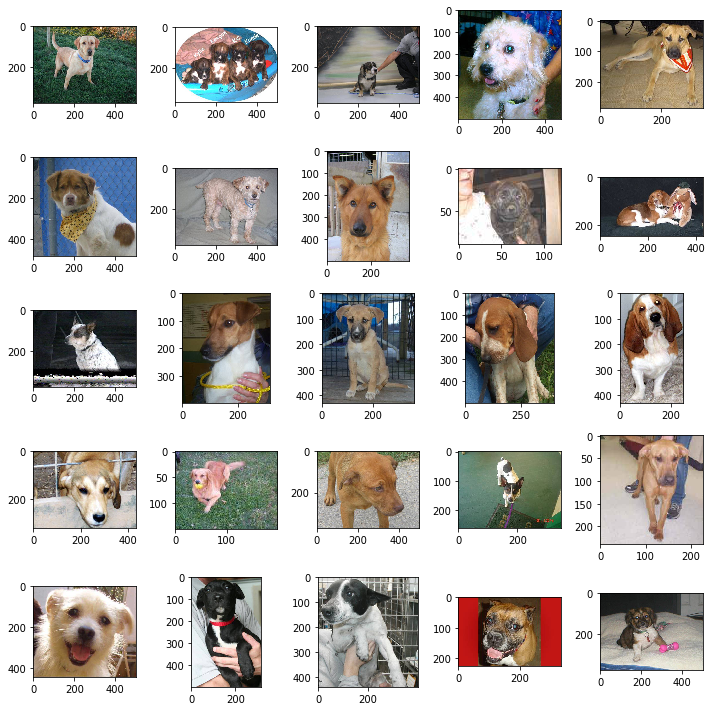

In [8]:
plot_images(train_dogs_dir)

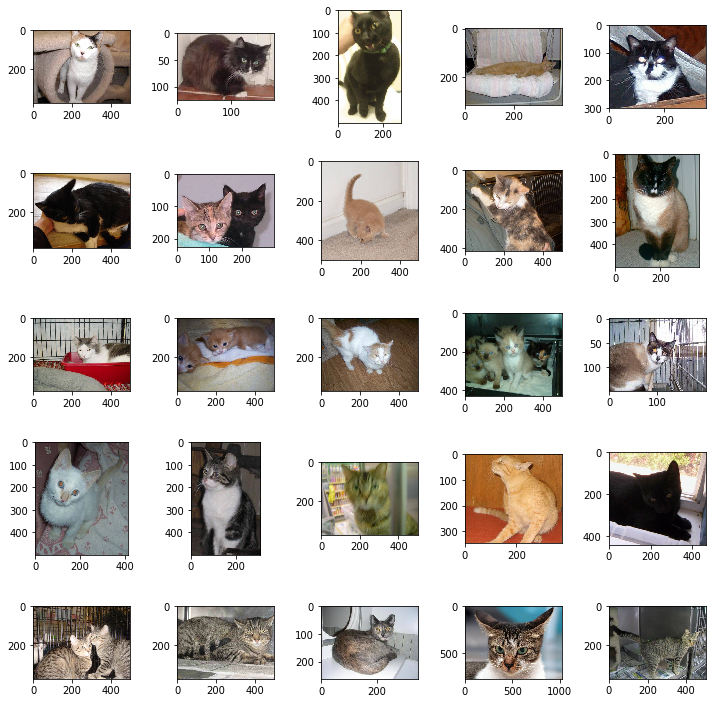

In [9]:
plot_images(train_cats_dir)

In [14]:
input_shape = (150, 150, 3)

model = Sequential([
    Conv2D(32, (3, 3), input_shape=input_shape),
    MaxPool2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D(2, 2),

    Flatten(),

    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [0]:
# normalizacja danych od 0 do 255

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2
)

Epoch 1/5
Epoch 1/5
100/100 - 9s - loss: 0.7043 - acc: 0.5135 - val_loss: 0.6927 - val_acc: 0.5140
Epoch 2/5
Epoch 1/5
100/100 - 8s - loss: 0.6756 - acc: 0.5460 - val_loss: 0.6642 - val_acc: 0.5980
Epoch 3/5
Epoch 1/5
100/100 - 8s - loss: 0.6730 - acc: 0.5800 - val_loss: 0.6354 - val_acc: 0.6410
Epoch 4/5
Epoch 1/5
100/100 - 8s - loss: 0.6288 - acc: 0.6550 - val_loss: 0.6329 - val_acc: 0.6030
Epoch 5/5
Epoch 1/5
100/100 - 8s - loss: 0.5978 - acc: 0.6875 - val_loss: 0.6247 - val_acc: 0.6610
